### Soil moisture retention curve

In [135]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [12]:
# Read the Excel data
Arable_data = pd.read_excel("../Data/sensor_data/24 KSU TAPS Arable.xlsx", 
                            sheet_name="Team #16 Data", 
                            skiprows=2)

# Remove space from column names
Arable_data.columns = Arable_data.columns.str.strip()

Arable_data.head()

,Timestamp,Chlorophyll Index,Arable Field Evapotranspiration (mm),Arable Canopy Evapotranspiration (mm),Growing Degree Days,Accumulated Growing Degree Days,NDVI,Minimum Relative Humidity,Relative Humidity at Max Temp,Relative Humidity at Min Temp,...,Crop Coefficient,Leaf Wetness (Hours),Dew Temp,Crop Water Demand (mm/day),Sun Duration,Wind Direction,Wind Speed,Wind Direction Degrees,Max Wind Speed,Min Wind Speed
0,2024-06-04,0.40,0.13,0.00,23,421,0.12,35,38,81,...,0.01,0,55,0.0,5.4,SE,3,141,5,0
1,2024-06-05,0.27,0.28,0.00,19,440,0.14,22,23,94,...,0.03,5,54,0.0,12.8,SSW,2,201,4,0
2,2024-06-06,0.27,0.28,0.01,22,461,0.14,28,28,75,...,0.03,0,49,0.0,12.8,E,2,87,4,0
3,2024-06-07,0.30,0.26,0.01,23,484,0.15,28,28,72,...,0.05,2,60,0.0,10.3,S,3,170,5,0
4,2024-06-08,0.31,0.23,0.01,21,506,0.16,49,49,89,...,0.05,8,61,0.0,10.8,ESE,4,122,6,0


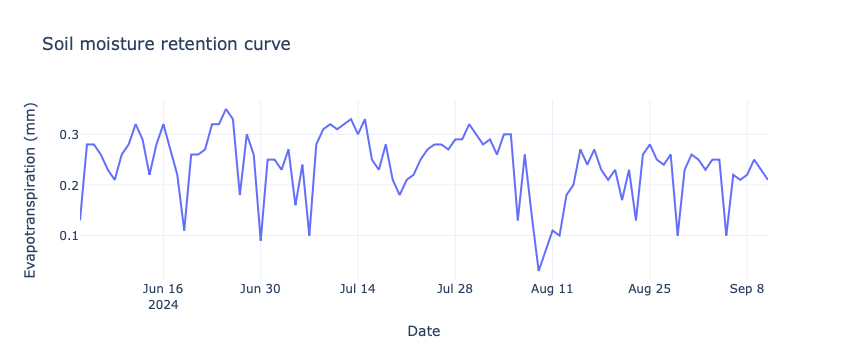

In [13]:
# Converting 'Timestamp' to datetime format
Arable_data['Timestamp'] = pd.to_datetime(Arable_data['Timestamp'])

# Plotting for Soil retention Curve (Arable Field Evapotranspiration)
fig = px.line(Arable_data, 
              x='Timestamp', 
              y='Arable Field Evapotranspiration (mm)', 
              title='Soil moisture retention curve')

fig.update_layout(xaxis_title='Date',
                  yaxis_title='Evapotranspiration (mm)',
                  template='plotly_white')

fig.show()

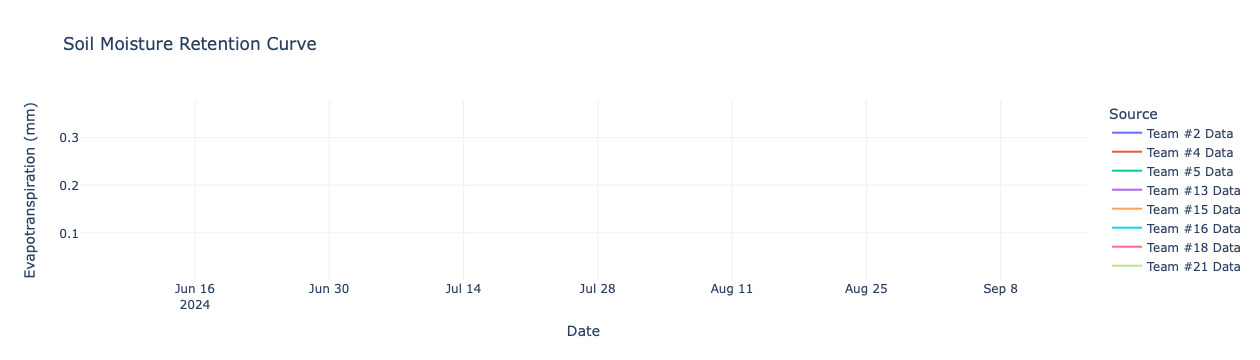

In [16]:
# Load the Excel file and get all sheet names
file_path = "../Data/sensor_data/24 KSU TAPS Arable.xlsx"
sheet_names = pd.ExcelFile(file_path).sheet_names

# Initialize an empty list to store data from all sheets
combined_data = []

# Loop through each sheet
for sheet in sheet_names:
    # Read and clean data for the current sheet
    data = pd.read_excel(file_path, sheet_name=sheet, skiprows=2)
    data.columns = data.columns.str.strip()  # Strip whitespace from column names
    
    # Check if 'Timestamp' and 'Arable Field Evapotranspiration (mm)' exist
    if 'Timestamp' in data.columns and 'Arable Field Evapotranspiration (mm)' in data.columns:
        # Convert 'Timestamp' to datetime
        data['Timestamp'] = pd.to_datetime(data['Timestamp'])
        # Add a column to indicate the sheet name (source)
        data['Source'] = sheet
        # Append the data to the list
        combined_data.append(data[['Timestamp', 'Arable Field Evapotranspiration (mm)', 'Source']])

# Concatenate all data into a single dataframe
all_data = pd.concat(combined_data, ignore_index=True)

# Plotting the combined data
fig = px.line(all_data, 
              x='Timestamp', 
              y='Arable Field Evapotranspiration (mm)', 
              color='Source',
              title='Soil Moisture Retention Curve')

fig.update_layout(xaxis_title='Date',
                  yaxis_title='Evapotranspiration (mm)',
                  template='plotly_white')

# Show the plot
fig.show()

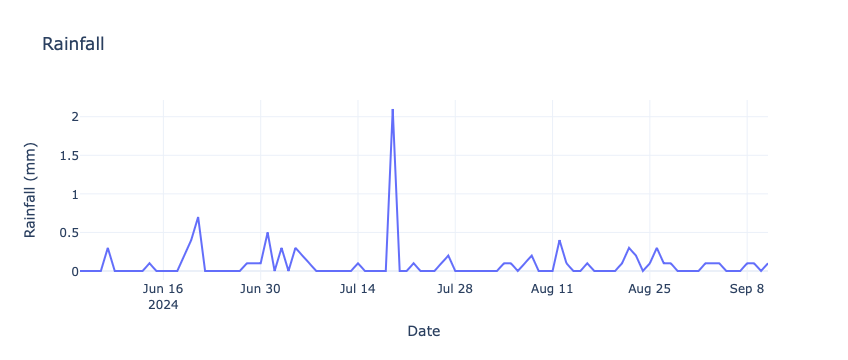

In [52]:
# Plotting Rainfall from Arable data
fig = px.line(Arable_data, 
              x='Timestamp', 
              y='Precipitation', 
              title='Rainfall')

fig.update_layout(xaxis_title='Date',
                  yaxis_title='Rainfall (mm)',
                  template='plotly_white')

fig.show()

In [56]:
# Irrigation values from Mesonet data

irrigation_data = pd.read_excel("../Data/Management/2024_TAPS_management.xlsx", 
                                sheet_name="Irrigation amounts", 
                                header=1)  

# Display the data 
irrigation_data.head()

,ID,2024-04-25 00:00:00,2024-05-23 00:00:00,2024-06-11 00:00:00,2024-06-18 00:00:00,2024-06-25 00:00:00,2024-07-02 00:00:00,2024-07-09 00:00:00,2024-07-10 00:00:00,2024-07-16 00:00:00,...,2024-07-23 00:00:00.1,2024-07-30 00:00:00,2024-08-06 00:00:00,2024-08-07 00:00:00,2024-08-13 00:00:00,2024-08-20 00:00:00,2024-08-27 00:00:00,2024-09-03 00:00:00,2024-09-10 00:00:00,Total
0,1,0.25,0,0,0.0,0.5,0.0,0.0,1.0,0.0,...,0.0,1.0,0.20,0.80,1.0,1.0,1.00,1.0,1.0,9.75
1,2,0.25,0,0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.15,0.85,1.0,1.0,1.00,1.0,1.0,13.25
2,3,0.25,0,0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.00,0.00,1.0,1.0,0.75,0.0,0.5,7.50
3,4,0.25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.25
4,5,0.25,0,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.7,1.0,0.30,0.70,1.0,1.0,1.00,1.0,1.0,10.25


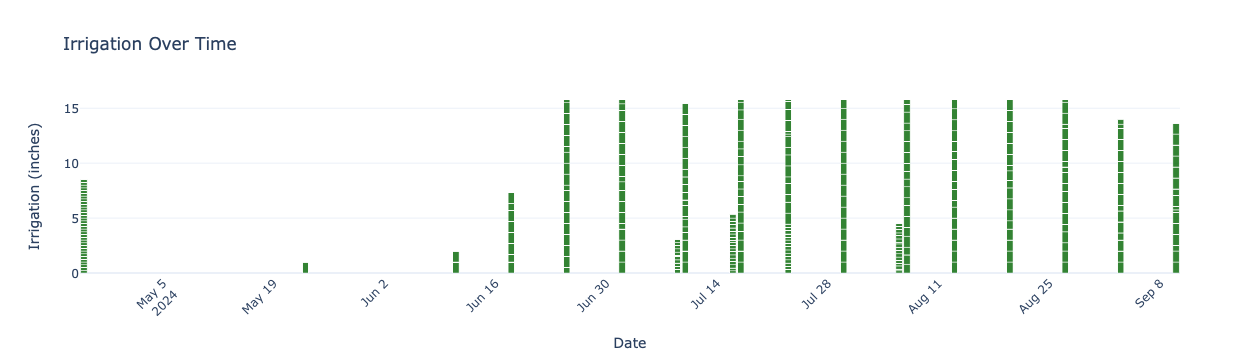

In [98]:
# simple bar plot for irrigation data
fig = px.bar(
    irrigation_data_long, 
    x='Timestamp', 
    y='Irrigation (inches)', 
    title='Irrigation Over Time'
)

fig.update_traces(marker_color='darkgreen', opacity=0.8)  
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Irrigation (inches)',
    template='plotly_white',
    yaxis=dict(range=[0, irrigation_data_long['Irrigation (inches)'].max() + 0.5]),  
    xaxis=dict(tickangle=-45)  
)
fig.show()

In [110]:
# Calculate ET₀ using Hargreaves formula with temperature
Arable_data['ET0 (mm/day)'] = 0.0023 * (Arable_data['Mean Temp'] + 17.8) * ((Arable_data['Max Temp'] - Arable_data['Min Temp']) ** 0.5)


In [114]:
# Calculate cumulative crop water demand, precipitation, and ET₀
Arable_data['Cumulative Crop Water Demand'] = Arable_data['Crop Water Demand (mm/day)'].cumsum()
Arable_data['Cumulative Precipitation'] = Arable_data['Precipitation'].cumsum()
Arable_data['Cumulative ET0'] = Arable_data['ET0 (mm/day)'].cumsum()

In [115]:

# Calculate total water supplied
Arable_data['Total Water Supplied (mm)'] = Arable_data['Cumulative Precipitation'] + Arable_data['Cumulative ET0']

# Calculate water deficit/surplus
Arable_data['Water Deficit/Surplus (mm)'] = Arable_data['Total Water Supplied (mm)'] - Arable_data['Cumulative Crop Water Demand']

In [118]:
# Calculate ET₀ using Hargreaves equation
Arable_data['ET0 (mm/day)'] = 0.0023 * (Arable_data['Mean Temp'] + 17.8) * ((Arable_data['Max Temp'] - Arable_data['Min Temp']) ** 0.5)


In [119]:
# Calculate Crop Water Demand (ETc) using ET₀ and crop coefficient (Kc)
Arable_data['Crop Water Demand (mm/day)'] = Arable_data['ET0 (mm/day)'] * Arable_data['Crop Coefficient']


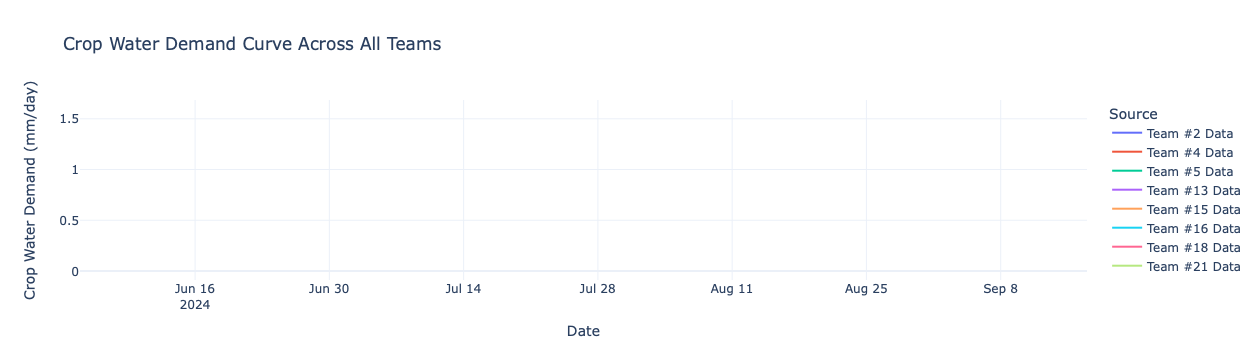

In [140]:
file_path = "../Data/sensor_data/24 KSU TAPS Arable.xlsx"
sheet_names = pd.ExcelFile(file_path).sheet_names

combined_data = []

# Loop through each sheet
for sheet in sheet_names:
    # Read and clean data for the current sheet
    data = pd.read_excel(file_path, sheet_name=sheet, skiprows=2)
    data.columns = data.columns.str.strip() 
    
    
    if 'Timestamp' in data.columns and 'Mean Temp' in data.columns and 'Max Temp' in data.columns and 'Min Temp' in data.columns and 'Crop Coefficient' in data.columns:
        # Convert 'Timestamp' to datetime
        data['Timestamp'] = pd.to_datetime(data['Timestamp'])
        
        # Calculate ET₀ (Reference Evapotranspiration) using the Hargreaves equation
        data['ET0 (mm/day)'] = 0.0023 * (data['Mean Temp'] + 17.8) * ((data['Max Temp'] - data['Min Temp']) ** 0.5)
        
        # Calculate Crop Water Demand (ETc) using ET₀ and the crop coefficient (Kc)
        data['Crop Water Demand (mm/day)'] = data['ET0 (mm/day)'] * data['Crop Coefficient']
        
    
        data['Source'] = sheet
        
        # Append the data to the list, focusing on the crop water demand
        combined_data.append(data[['Timestamp', 'Crop Water Demand (mm/day)', 'Source']])

# Concatenate all data into a single dataframe
all_data = pd.concat(combined_data, ignore_index=True)

# Plotting the combined data
fig = px.line(all_data, 
              x='Timestamp', 
              y='Crop Water Demand (mm/day)', 
              color='Source',
              title='Crop Water Demand Curve Across All Teams')

fig.update_layout(xaxis_title='Date',
                  yaxis_title='Crop Water Demand (mm/day)',
                  template='plotly_white')

# Show the plot
fig.show()


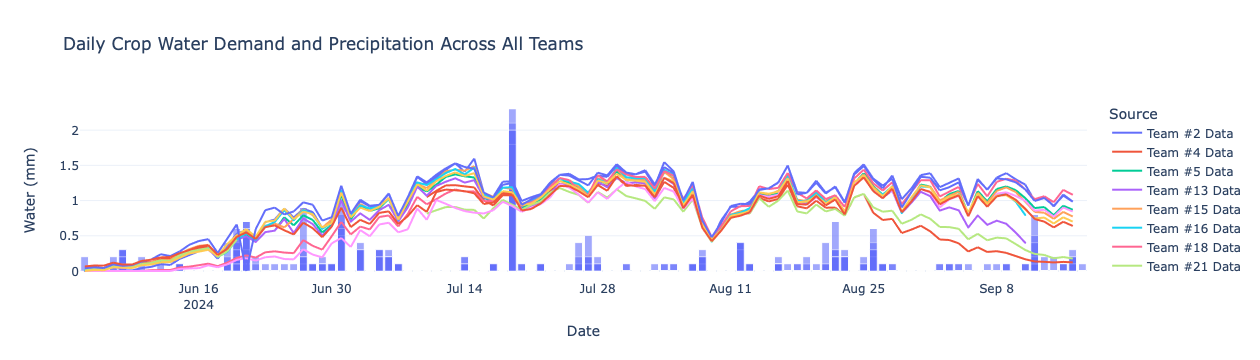

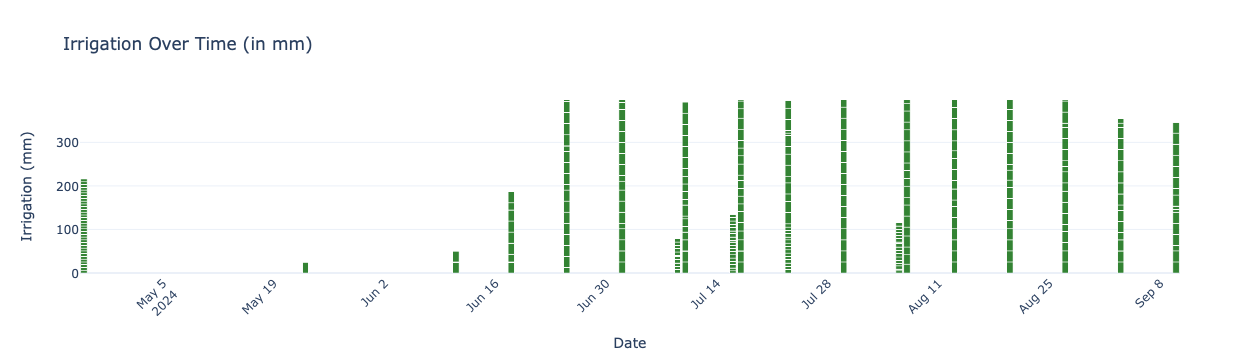

In [142]:
import pandas as pd
import plotly.express as px

# Load the Excel file and get all sheet names
file_path = "../Data/sensor_data/24 KSU TAPS Arable.xlsx"
sheet_names = pd.ExcelFile(file_path).sheet_names

# Initialize an empty list to store data from all sheets
combined_data = []

# Loop through each sheet
for sheet in sheet_names:
    # Read and clean data for the current sheet
    data = pd.read_excel(file_path, sheet_name=sheet, skiprows=2)
    data.columns = data.columns.str.strip()  # Strip whitespace from column names
    
    # Check if necessary columns exist
    if 'Timestamp' in data.columns and 'Mean Temp' in data.columns and 'Max Temp' in data.columns and 'Min Temp' in data.columns and 'Crop Coefficient' in data.columns and 'Precipitation' in data.columns:
        # Convert 'Timestamp' to datetime
        data['Timestamp'] = pd.to_datetime(data['Timestamp'])
        
        # Calculate ET₀ (Reference Evapotranspiration) using the Hargreaves equation
        data['ET0 (mm/day)'] = 0.0023 * (data['Mean Temp'] + 17.8) * ((data['Max Temp'] - data['Min Temp']) ** 0.5)
        
        # Calculate Crop Water Demand (ETc) using ET₀ and the crop coefficient (Kc)
        data['Crop Water Demand (mm/day)'] = data['ET0 (mm/day)'] * data['Crop Coefficient']
        
        # Add a column to indicate the sheet name (source)
        data['Source'] = sheet
        
        # Append the data to the list, focusing on daily crop water demand and precipitation
        combined_data.append(data[['Timestamp', 'Crop Water Demand (mm/day)', 'Precipitation', 'Source']])

# Concatenate all data into a single dataframe
all_data = pd.concat(combined_data, ignore_index=True)

# Plotting daily crop water demand and precipitation for each team
fig = px.line(all_data, 
              x='Timestamp', 
              y='Crop Water Demand (mm/day)', 
              color='Source',
              title='Daily Crop Water Demand and Precipitation Across All Teams')

# Add daily precipitation as a separate trace, matching each team color
for source in all_data['Source'].unique():
    fig.add_trace(
        px.bar(all_data[all_data['Source'] == source], 
               x='Timestamp', 
               y='Precipitation',
               opacity=0.6).data[0]
    )

# Update layout for readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Water (mm)',
    template='plotly_white',
    legend_title_text='Source',
    barmode='overlay'
)

# Show the plot
fig.show()


# Convert irrigation data from inches to mm
irrigation_data_long['Irrigation (mm)'] = irrigation_data_long['Irrigation (inches)'] * 25.4

# Create a bar plot for irrigation data in mm
fig = px.bar(
    irrigation_data_long, 
    x='Timestamp', 
    y='Irrigation (mm)',  # Use the converted column
    title='Irrigation Over Time (in mm)'
)

# Update plot styling
fig.update_traces(marker_color='darkgreen', opacity=0.8)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Irrigation (mm)',
    template='plotly_white',
    yaxis=dict(range=[0, irrigation_data_long['Irrigation (mm)'].max() + 10]),  
    xaxis=dict(tickangle=-45)
)

fig.show()


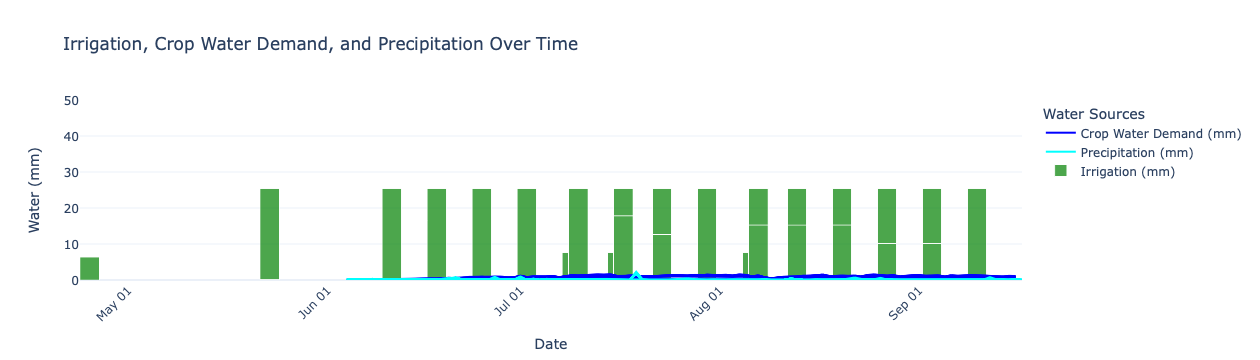

In [143]:

fig = go.Figure()

# daily crop water demand line
fig.add_trace(go.Scatter(
    x=all_data['Timestamp'],
    y=all_data['Crop Water Demand (mm/day)'],
    mode='lines',
    name='Crop Water Demand (mm)',
    line=dict(color='blue')
))

# daily precipitation line
fig.add_trace(go.Scatter(
    x=all_data['Timestamp'],
    y=all_data['Precipitation'],
    mode='lines',
    name='Precipitation (mm)',
    line=dict(color='aqua')
))

# daily irrigation as a bar plot
fig.add_trace(go.Bar(
    x=irrigation_data_long['Timestamp'],
    y=irrigation_data_long['Irrigation (mm)'],
    name='Irrigation (mm)',
    marker=dict(color='green'),
    opacity=0.7,
    width=86400000 * 3  
))

#  layout for  readability
fig.update_layout(
    title='Irrigation, Crop Water Demand, and Precipitation Over Time',
    xaxis_title='Date',
    yaxis_title='Water (mm)',
    template='plotly_white',
    barmode='overlay',  
    legend_title_text='Water Sources',
    xaxis=dict(
        tickformat='%b %d',       
        dtick="M1",                
        tickangle=-45             
    ),
    yaxis=dict(range=[0, 50]),   
)

fig.show()


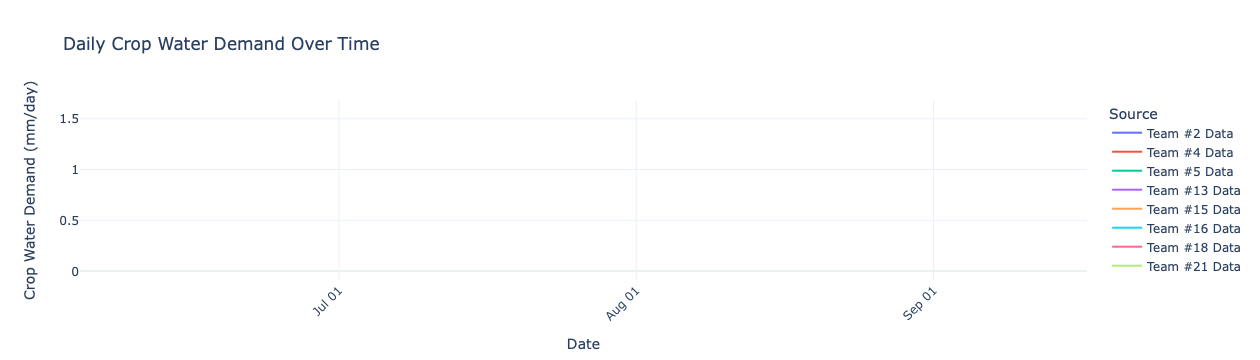

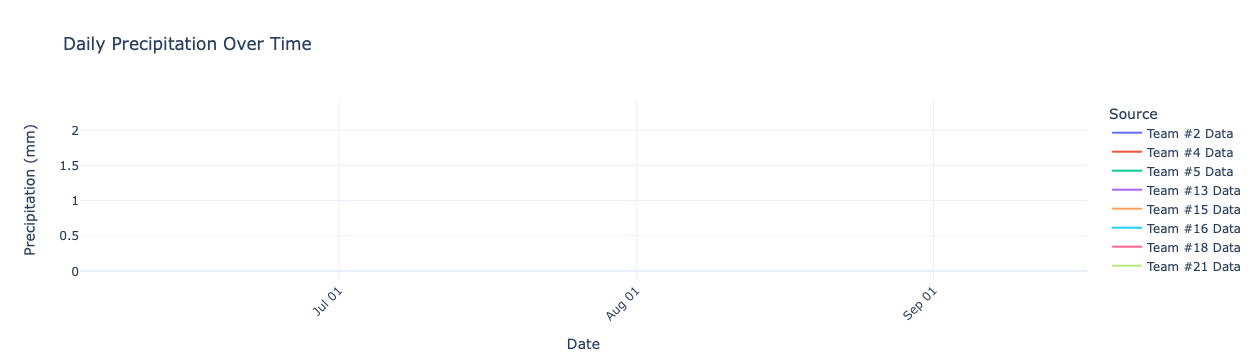

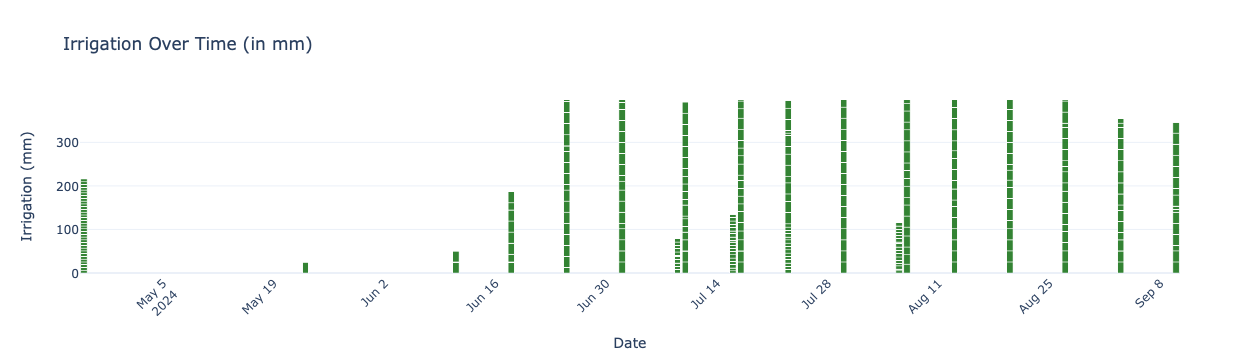

In [138]:
import plotly.express as px

# Plot 1: Daily Crop Water Demand
fig_demand = px.line(
    all_data, 
    x='Timestamp', 
    y='Crop Water Demand (mm/day)', 
    title='Daily Crop Water Demand Over Time',
    color='Source'
)
fig_demand.update_layout(
    xaxis_title='Date',
    yaxis_title='Crop Water Demand (mm/day)',
    template='plotly_white',
    xaxis=dict(tickformat='%b %d', dtick="M1", tickangle=-45)  # Monthly ticks for clarity
)
fig_demand.show()

# Plot 2: Daily Precipitation
fig_precipitation = px.line(
    all_data, 
    x='Timestamp', 
    y='Precipitation', 
    title='Daily Precipitation Over Time',
    color='Source'
)
fig_precipitation.update_layout(
    xaxis_title='Date',
    yaxis_title='Precipitation (mm)',
    template='plotly_white',
    xaxis=dict(tickformat='%b %d', dtick="M1", tickangle=-45)  # Monthly ticks for clarity
)
fig_precipitation.show()


# Convert irrigation data from inches to mm
irrigation_data_long['Irrigation (mm)'] = irrigation_data_long['Irrigation (inches)'] * 25.4

# Create a bar plot for irrigation data in mm
fig = px.bar(
    irrigation_data_long, 
    x='Timestamp', 
    y='Irrigation (mm)',  # Use the converted column
    title='Irrigation Over Time (in mm)'
)

# Update plot styling
fig.update_traces(marker_color='darkgreen', opacity=0.8)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Irrigation (mm)',
    template='plotly_white',
    yaxis=dict(range=[0, irrigation_data_long['Irrigation (mm)'].max() + 10]),  
    xaxis=dict(tickangle=-45)
)

fig.show()
